In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression 
import seaborn as sns
sns.set_theme()

In [89]:
raw_data = pd.read_csv("C:/Users/Yasmine Mohsen/Downloads/1.04.+Real-life+example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Preprocessing

Exploring the descriptive statistics of the variables                                 
(to spot problems such as missing values, outliers, or skewness in order to clean the data) 

In [90]:
raw_data.describe(include='all') 
# now we have descriptives for the categorical variables as well as for the numerical variables
# the count of all the variables is not the same for all categories, which indicates that there are missing values

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Determining the variables of interest

In [91]:
data=raw_data.drop(['Model'],axis=1)
data.describe(include='all')
# axis=1 because we're dropping a column, not a row

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Dealing with missing values                           
(price and engineV columns have missing values: Price has 172 missing values, engineV has 150 missing values)

In [92]:
data.isnull().sum()
# true=1 --> missing values , false=0--> no missing values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [93]:
# Rule:if you are removing <5% of the observations-->remove all the observations with missing values
data_no_mv=data.dropna(axis=0)
# axis=0 because we're dropping a row (observation) not a column

In [94]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Exploring PDFs (Probability Distribution Functions) 

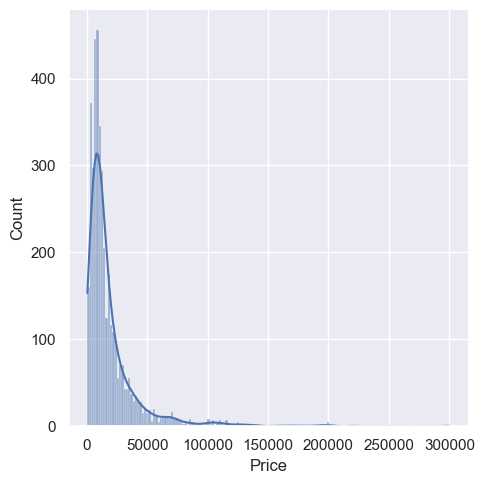

In [95]:
sns.displot(data_no_mv['Price'],kde=True)
# we have outliers in the Price variable (right skewed)

Dealing with outliers

In [96]:
q=data_no_mv['Price'].quantile(0.99)
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


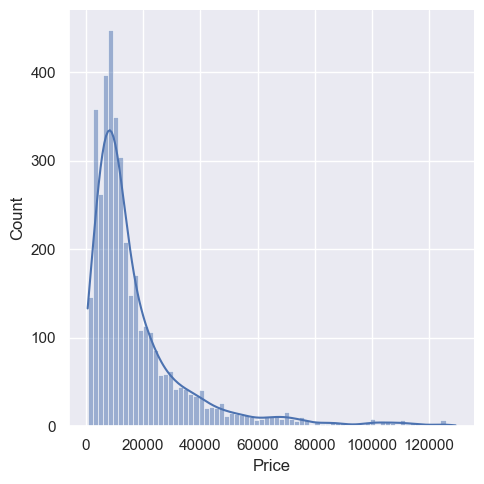

In [97]:
sns.displot(data_1['Price'],kde=True)

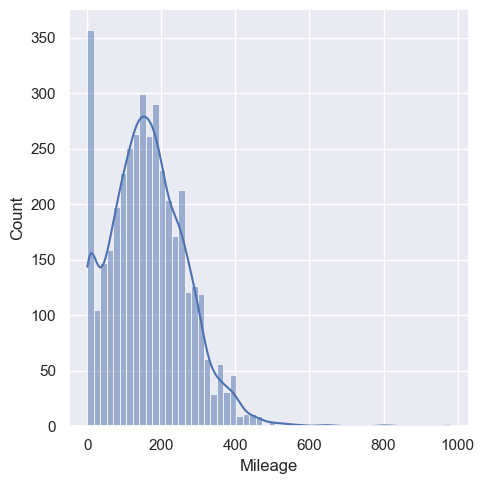

In [98]:
sns.displot(data_no_mv['Mileage'],kde=True)

In [99]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

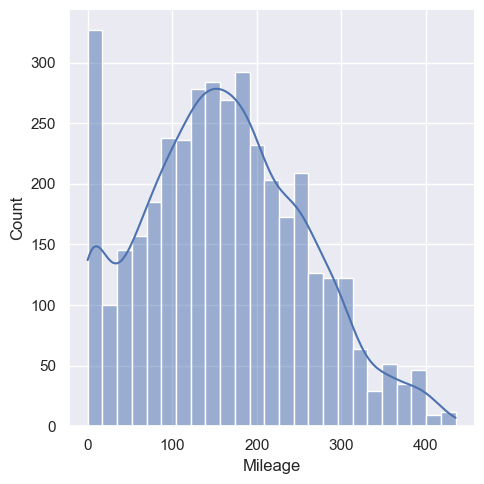

In [100]:
sns.displot(data_2['Mileage'], kde=True)

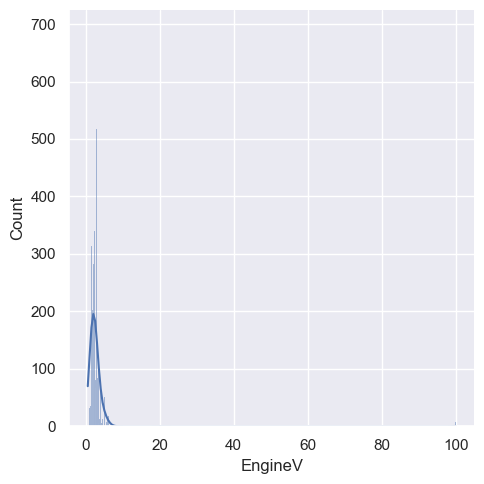

In [101]:
sns.displot(data_no_mv['EngineV'], kde=True)
# normally, engine values should be between 0 and 6.5, but there are some outliers (99.99,75...)

In [102]:
data_3 = data_2[data_2['EngineV']<6.5]
#remove all values lower than 6.5

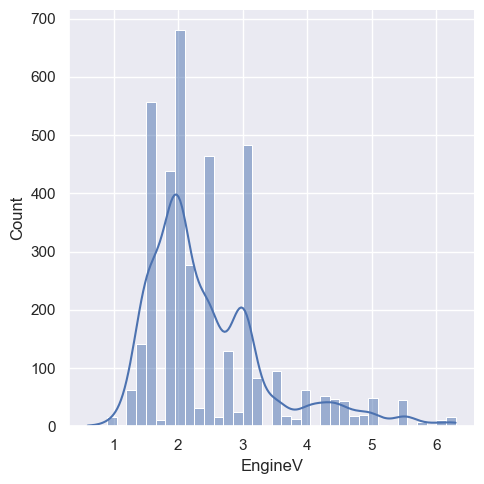

In [103]:
sns.displot(data_3['EngineV'], kde=True)

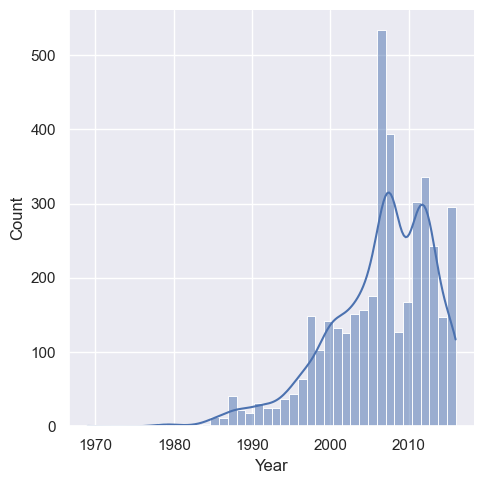

In [104]:
sns.displot(data_no_mv['Year'], kde=True)

In [105]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
# 99% of the cars are from 1985 to 2005, so we will remove the 1% of the cars that are older and keep the 99% of the cars that are younger

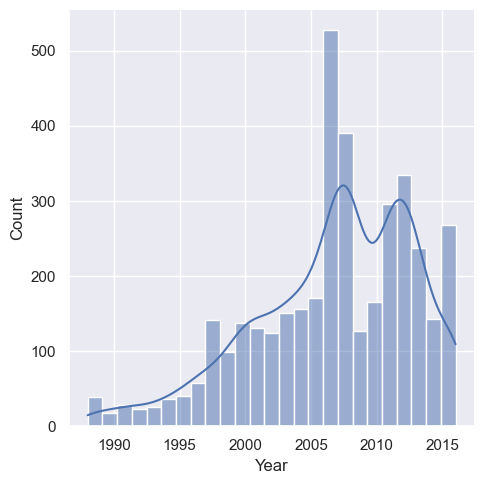

In [106]:
sns.displot(data_4['Year'], kde=True)

In [107]:
data_cleaned=data_4.reset_index(drop=True)
# we use reset_index() to reset the index of the dataframe after removing the outliers which are useful for the analysis

In [108]:
data_cleaned.describe(include='all')
# overall, we have deleted 250 observations

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Checking OLS Assumptions                   
(continuous variables: 'Price','Year','EngineV' and 'Mileage' are those that are likely to be more challenging and cause us more problems with our OLS assumptions),(we don't have to worry about 'Model' and 'Car' because they are categorical and are represented by dummy variables so they don't affect our OLS assumptions)  

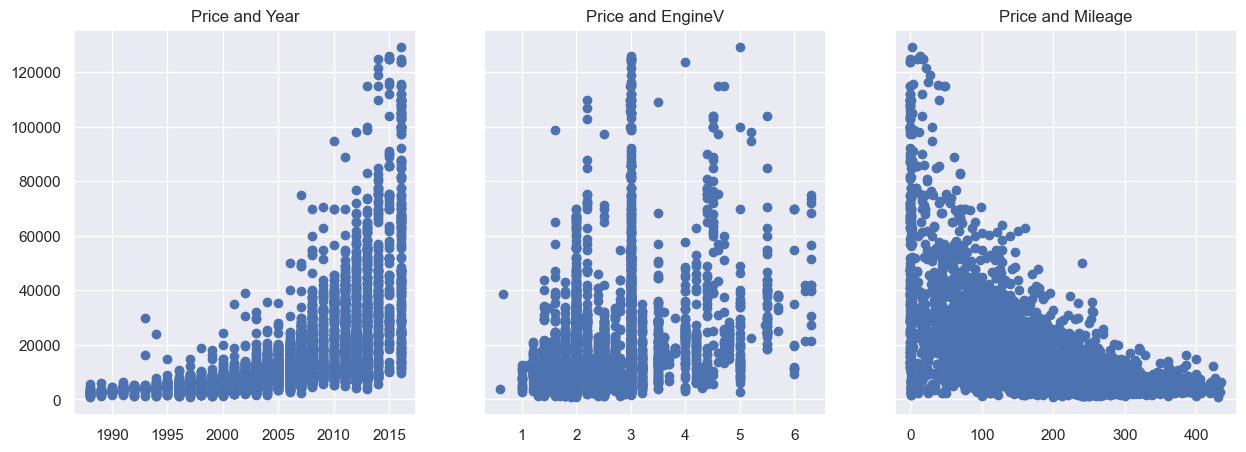

In [109]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

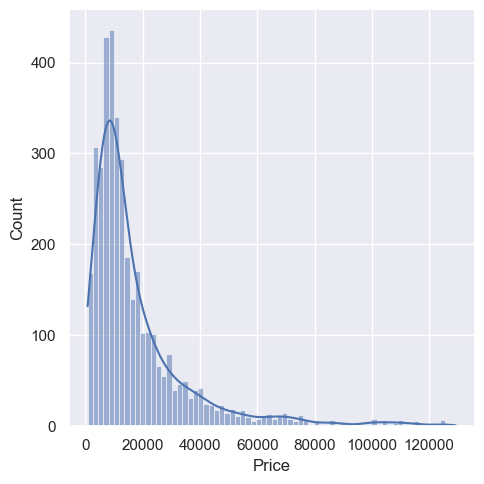

In [110]:
sns.displot(data_cleaned['Price'], kde=True)

Relaxing the assumptions

In [111]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned
# we have transformed the price variable to a logarithmic scale, so we can have a linear relationship between the price and the other variables

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


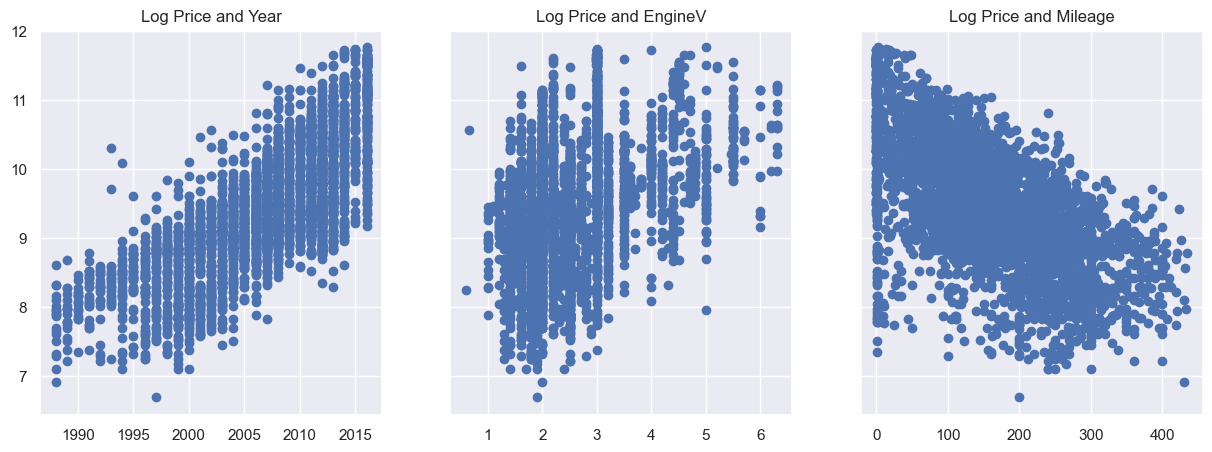

In [112]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()
# we can see a linear pattern in all plots now

In [113]:
data_cleaned=data_cleaned.drop('Price',axis=1)
# drop the original price column since it's no longer needed

Multicollinearity

In [114]:
data_cleaned.columns.values
# We know that the year and the mileage are correlated :
# the newer the car the lower its mileage 

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"]=variables.columns

In [116]:
vif
# for vif=0--> no multicollinearity, 
# for 1< vif <5--> perfectly correlated, 
# for vif >10 --> unacceptable

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [117]:
data_no_multicollinearity=data_cleaned.drop('Year',axis=1)
data_no_multicollinearity
# year is too correlated with other variables, so we will remove it

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Create dummy variables                        
(data preprocessing)

In [118]:
#If we need to add many dummies simultaneously, we can use pandas get_dummies() function.
# Note: If we have N categories, we will create N-1 dummies to avoid multicollinearity.
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)
# drop_first=True to avoid creating a dummy variable for the first category we have here which is Audi

In [119]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [121]:
# Check the VIF of the features including the dummies

variables2=data_with_dummies[['log_price','Mileage','EngineV','Brand_BMW','Brand_Mercedes-Benz','Brand_Volkswagen']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables2.values,i) for i in range(variables2.shape[1])]
vif["features"]=variables2.columns
vif


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Rearrange a bit

In [122]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [123]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [124]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Linear Regression Model

##### Declare the inputs and the target variables

In [125]:
targets= data_preprocessed['log_price']
inputs=data_preprocessed.drop('log_price',axis=1)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [128]:
input_scaled = scaler.transform(inputs)
# standardize the inputs

##### Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

##### Create The Regression

In [130]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [131]:
y_hat=reg.predict(X_train)

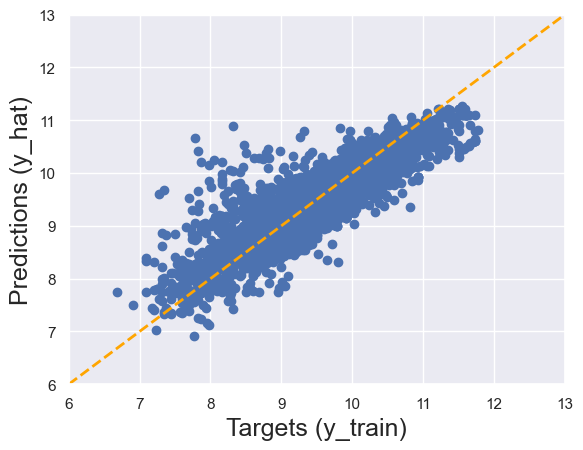

In [137]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)  
plt.ylim(6,13)
plt.plot([6, 13], [6, 13], color='orange', linestyle='--', linewidth=2, label='45-degree line')
plt.show()
# the values should be on the 45-degree line, indicating a good fit

Text(0.5, 1.0, 'Residuals PDF')

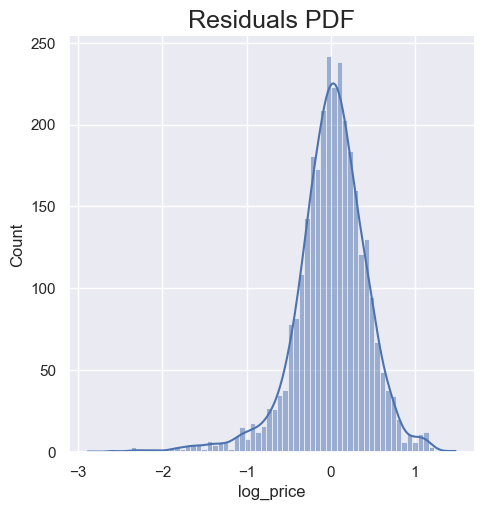

In [133]:
sns.displot(y_train-y_hat,kde=True)
plt.title('Residuals PDF',size=18)
# there are a much longer tail on the negative side, indicating that our model might not be the best fit for this data

In [135]:
# let's calculate the R-squared
reg.score(X_train,y_train)
# our model is explaining 75% of the variability of the data, which is good but could be better

0.744996578792662

##### Finding the weights and bias

In [138]:
reg.intercept_
#bias

9.415239458021299

In [139]:
reg.coef_
# weights

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [143]:
# create a summary table with feature names and the corresponding weights 
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary
# the bigger the weight, the more important the feature is in determining the log_price of a car.
# some weights are positive and some are negative
# a positive weight indicates that as the feature increases in value, the log_price and 'Price" increase respectively
#a negative weight indicates that as the feature increases in value, the log_price and 'Price" decrease
# Dummy varibles:
# 1. A positive weight shows that the respective category(Brand) is more expensive than the benchmark (Audi)
# 2. A negative weight shows that the respective category(Brand) is less expensive than the benchmark (Audi).

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [142]:
data_cleaned['Brand'].unique()
# we can see that Audi is not shown in the table above 
# so Audi is the variable dropped from the model
# So we know now that Audi is the benchmark in our model.
# dummies are compared to Audi (benchmark) to determine the price of other brands.

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

##### Testing the model

In [146]:
y_hat_test=reg.predict(X_test)

(6.0, 13.0)

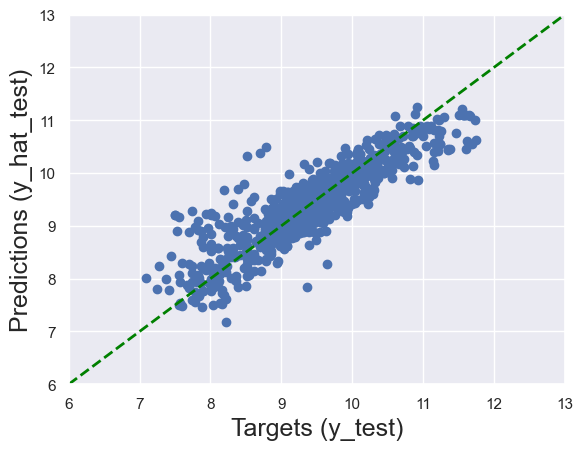

In [148]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.plot([6, 13], [6, 13], color='green', linestyle='--', linewidth=2, label='45-degree line')
plt.xlim(6,13)  
plt.ylim(6,13)
# for higher prices, we have a more concentration of predictions around the 45-degree line, indicating a good fit (great predictions)
# for lower prices, we have a more spread out predictions, indicating that our model might not be the best fit

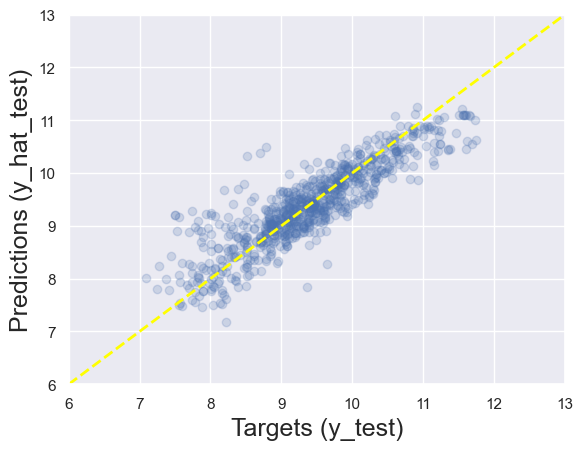

In [151]:
# alpha: specifies the opacity 
# the more saturated the color, the higher the concentration
# the less saturated the color, the lower the concentration
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.plot([6, 13], [6, 13], color='yellow', linestyle='--', linewidth=2, label='45-degree line')
plt.xlim(6,13)  
plt.ylim(6,13)
plt.show()

In [154]:
# df_pf: dataframe for performance evaluation
df_pf=pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()
# these are the predictions for the log prices
# if we take the exponential of these predictions, we get the original prices

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


In [156]:
# these are the predictions of the exponential of the log prices--> original prices
df_pf=pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [158]:
# place the true prices in the dataframe so we can compare them with the predictions
df_pf['Target']=np.exp(y_test)
df_pf
# we have a lot of missing values and they are quite randomly spread

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [160]:
y_test=y_test.reset_index(drop=True)
y_test.head()
# reset the index of y_test to match the index of df_pf

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [161]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [162]:
df_pf['Residual']=df_pf['Target']-df_pf['Prediction']
# the residual is the difference between the target and the prediction
# lower the residual, the better the prediction

In [163]:
df_pf['Difference%']=np.abs(df_pf['Residual']/df_pf['Target']*100)

In [164]:
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [167]:
df_pf.describe()
# the min difference percentage is 0.06%, so the output is very close to the actual prices
# the max difference percentage is 512.68%, so the output is very far from the actual prices
# for most of our predictions, we got relatively close to the actual prices

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [170]:
pd.options.display.max_rows=999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])
# if we go to the bottom of the table, we see that there are very few predictions are relatively far off from the observed prices(targets)
# targets are extremely low: 2500$, 2200$, 1700$...
# for these last samples, the residuals are negative, which means we underestimated the prices and: 
# the predictions are higher than the targets, indicating that we are missing an important factor (may be the model of the car which we removed, or that the car is damaged which we don't consider in our model) 
# these are the outliers in our dataset.


# how to improve our model:
# 1. use a different set of variables (add more features)
# 2. remove a bigger part of the outliers
# 3. use different kinds of transformations 

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
